In [3]:
#package
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import jn
from IPython.display import display, clear_output
import time

warnings.filterwarnings('ignore')
%matplotlib inline

## model
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

## data
from sklearn.decomposition import PCA,FastICA,FactorAnalysis,SparsePCA
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
file_path = 'C:/Users/lyx18/Downloads/cleaned_car_ad.csv'
df = pd.read_csv(file_path, encoding='utf-8')

df['car_code'], car_mapping = pd.factorize(df['car'])
df['body_code'], body_mapping = pd.factorize(df['body'])
df['engType_code'], engType_mapping = pd.factorize(df['engType'])
df['registration_code'], registartion_mapping = pd.factorize(df['registration'])
df['model_code'], model_mapping = pd.factorize(df['model'])
df['drive_code'], drive_mapping = pd.factorize(df['drive'])
df['year_diff'] = 2024 - df['year']

df_numeric = df[['price', 'mileage', 'engV', 'year_diff', 'car_code', 'body_code', 'engType_code', 'registration_code', 'model_code', 'drive_code']]
output_file = 'C:/Users/lyx18/Downloads/cleaned_car_ad_encoded.csv'
df_numeric.to_csv(output_file, index=False, encoding='utf-8')

print(df_numeric.head())

     price  mileage  engV  year_diff  car_code  body_code  engType_code  \
0  15500.0       68   2.5         14         0          0             0   
1  20500.0      173   1.8         13         1          1             0   
2  35000.0      135   5.5         16         1          2             1   
3  17800.0      162   1.8         12         1          3             2   
4  16600.0       83   2.0         11         2          0             1   

   registration_code  model_code  drive_code  
0                  0           0           0  
1                  0           1           1  
2                  0           2           1  
3                  0           3           2  
4                  0           4           0  


In [5]:
#Import data
Train_data = pd.read_csv('C:/Users/lyx18/Downloads/cleaned_car_ad_encoded.csv', sep=',', encoding='utf-8')
Test_data = pd.read_csv('C:/Users/lyx18/Downloads/cleaned_car_ad_encoded.csv', sep=',', encoding='utf-8')
print('Train data shape:',Train_data.shape)
print('TestA data shape:',Test_data.shape)

Train_data.head()

Train data shape: (8739, 10)
TestA data shape: (8739, 10)


,price,mileage,engV,year_diff,car_code,body_code,engType_code,registration_code,model_code,drive_code
0,15500.0,68,2.5,14,0,0,0,0,0,0
1,20500.0,173,1.8,13,1,1,0,0,1,1
2,35000.0,135,5.5,16,1,2,1,0,2,1
3,17800.0,162,1.8,12,1,3,2,0,3,2
4,16600.0,83,2.0,11,2,0,1,0,4,0


In [6]:
Train_data.info()
Train_data.columns
Train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8739 entries, 0 to 8738
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              8739 non-null   float64
 1   mileage            8739 non-null   int64  
 2   engV               8739 non-null   float64
 3   year_diff          8739 non-null   int64  
 4   car_code           8739 non-null   int64  
 5   body_code          8739 non-null   int64  
 6   engType_code       8739 non-null   int64  
 7   registration_code  8739 non-null   int64  
 8   model_code         8739 non-null   int64  
 9   drive_code         8739 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 682.9 KB


,price,mileage,engV,year_diff,car_code,body_code,engType_code,registration_code,model_code,drive_code
count,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000
mean,15733.542261,140.095434,2.588607,17.390319,13.063394,1.815997,1.195560,0.057558,178.367319,1.289392
std,24252.904810,97.892213,5.416670,6.968947,11.187681,1.671805,0.761183,0.232919,178.024390,0.874679
min,0.000000,0.000000,0.100000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.000000,71.000000,1.600000,12.000000,5.000000,1.000000,1.000000,0.000000,44.000000,0.000000
50%,9250.000000,130.000000,2.000000,16.000000,11.000000,1.000000,1.000000,0.000000,117.000000,2.000000
75%,16800.000000,195.500000,2.500000,20.000000,18.000000,3.000000,2.000000,0.000000,256.000000,2.000000
max,547800.000000,999.000000,99.990000,65.000000,82.000000,5.000000,3.000000,1.000000,851.000000,2.000000


In [7]:
# Extract feature column names of numeric types
numerical_cols = Train_data.select_dtypes(exclude = 'object').columns
print(numerical_cols)
Train_data.isnull().sum()
Test_data.isnull().sum()

# Distribution of projected values
Train_data['price']
Train_data['price'].value_counts()

Index(['price', 'mileage', 'engV', 'year_diff', 'car_code', 'body_code',
       'engType_code', 'registration_code', 'model_code', 'drive_code'],
      dtype='object')


price
0.00        244
8500.00      86
6500.00      80
7500.00      76
3500.00      75
           ... 
9888.00       1
8050.00       1
36300.00      1
3667.95       1
14474.00      1
Name: count, Length: 1291, dtype: int64

<Axes: title={'center': 'Log Normal'}, xlabel='price'>

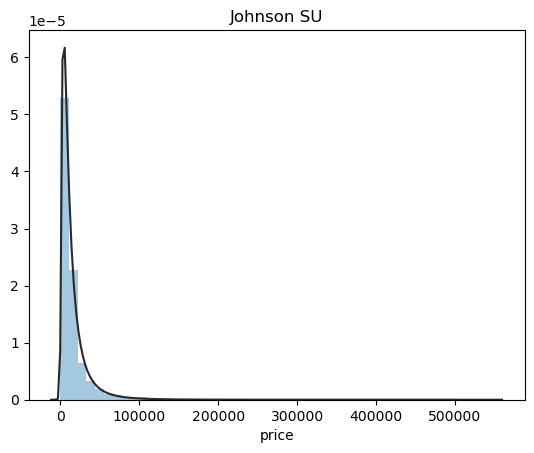

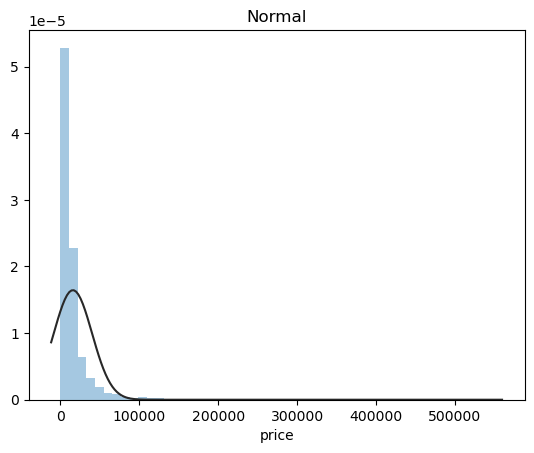

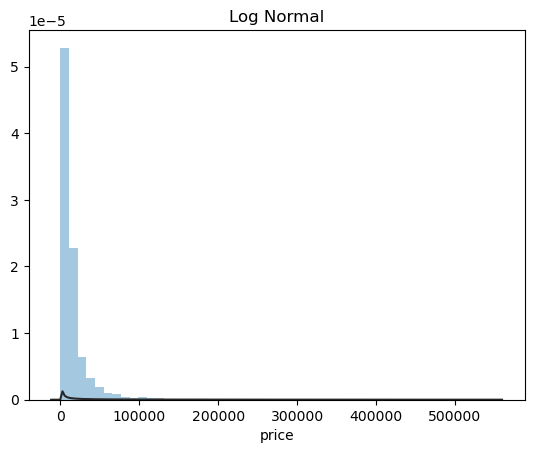

In [8]:
#Overall distribution profile
#Best fit is unbounded Johnson distribution
import scipy.stats as st
y = Train_data['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

Skewness: 7.227755
Kurtosis: 96.776473


<Axes: xlabel='Kurtness', ylabel='Density'>

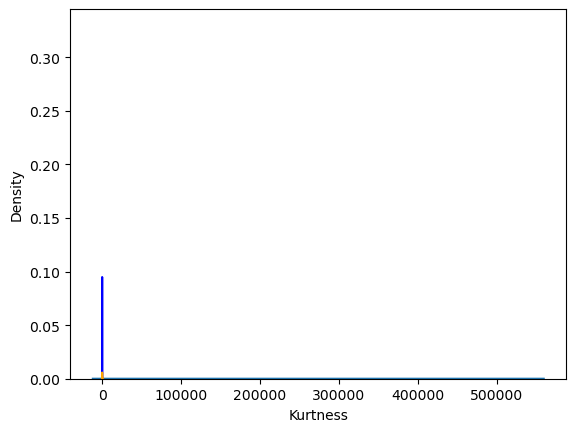

In [9]:
#skewness and kurtosis
sns.distplot(Train_data['price']);
print("Skewness: %f" % Train_data['price'].skew())
print("Kurtosis: %f" % Train_data['price'].kurt())

Train_data.skew(), Train_data.kurt()

sns.distplot(Train_data.skew(),color='blue',axlabel ='Skewness')

sns.distplot(Train_data.kurt(),color='orange',axlabel ='Kurtness')

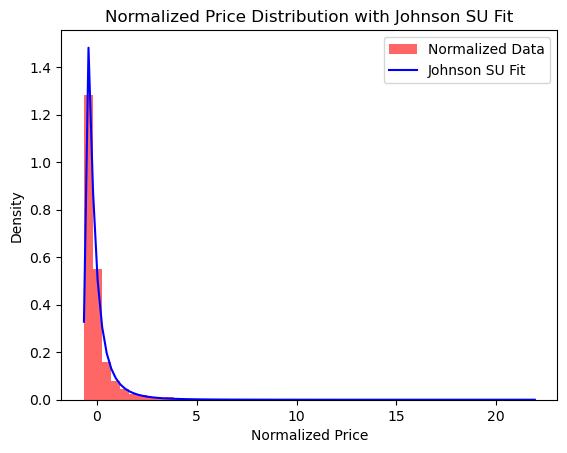

In [10]:
#import matplotlib.pyplot as plt
#import numpy as np
#import pandas as pd
from scipy.stats import johnsonsu

# Standardized data
price_mean = Train_data['price'].mean()
price_std = Train_data['price'].std()
Train_data['price_normalized'] = (Train_data['price'] - price_mean) / price_std

# 2. Fitting with the Johnson SU distribution
params = johnsonsu.fit(Train_data['price_normalized'])  
shape1, shape2, loc, scale = params  

# 3. Plotting of standardized histograms
plt.hist(Train_data['price_normalized'], bins=50, density=True, alpha=0.6, color='red', label='Normalized Data')

# 4. Generate fitted curves for Johnson SU distribution
x = np.linspace(min(Train_data['price_normalized']), max(Train_data['price_normalized']), 100)
pdf_fitted = johnsonsu.pdf(x, shape1, shape2, loc, scale) 

# 5. Plotting the fitting curve
plt.plot(x, pdf_fitted, 'blue', label='Johnson SU Fit')
plt.title('Normalized Price Distribution with Johnson SU Fit')
plt.xlabel('Normalized Price')
plt.ylabel('Density')
plt.legend()
plt.show()


In [15]:
#导入
train = pd.read_csv('C:/Users/lyx18/Downloads/cleaned_car_ad_encoded.csv', sep=',', encoding='utf-8')
test = pd.read_csv('C:/Users/lyx18/Downloads/cleaned_car_ad_encoded.csv', sep=',', encoding='utf-8')

## 输出数据的大小信息
#print('Train data shape:',Train_data.shape)
#print('Test data shape:',Test_data.shape)

#Train_data.head()

In [24]:
#import data
Train_data2 = pd.read_csv('C:/Users/lyx18/Downloads/cleaned_car_ad_encoded2.csv', sep=',', encoding='utf-8')
Test_data2 = pd.read_csv('C:/Users/lyx18/Downloads/cleaned_car_ad_encoded2.csv', sep=',', encoding='utf-8')


print('Train data shape:',Train_data2.shape)
print('Test data shape:',Test_data2.shape)

Train_data2.head()

Train data shape: (8739, 17)
Test data shape: (8739, 17)


,car,price,body,mileage,engV,engType,registration,year,model,drive,car_code,body_code,engType_code,registration_code,model_code,drive_code,year_diff
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,0,0,0,0,0,0,14
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,1,1,0,0,1,1,13
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear,1,2,1,0,2,1,16
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front,1,3,2,0,3,2,12
4,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full,2,0,1,0,4,0,11


Delete number is: 224


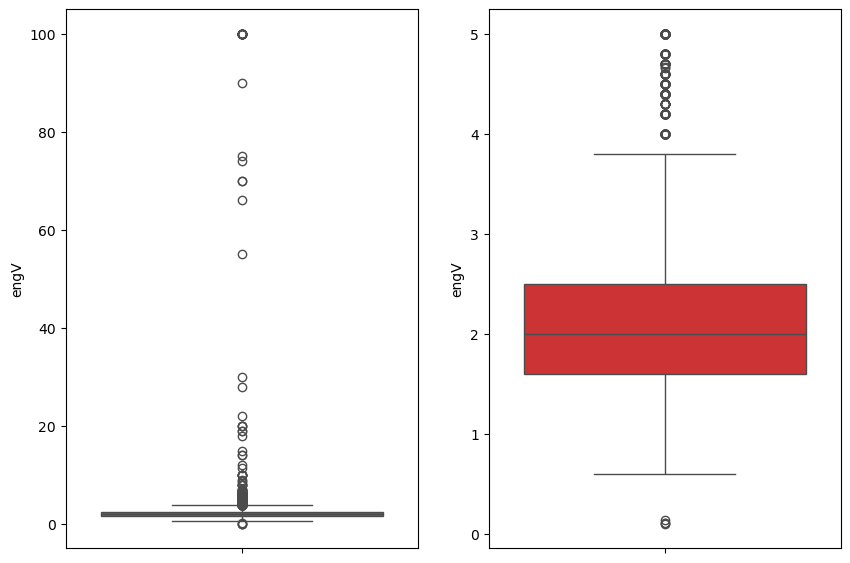

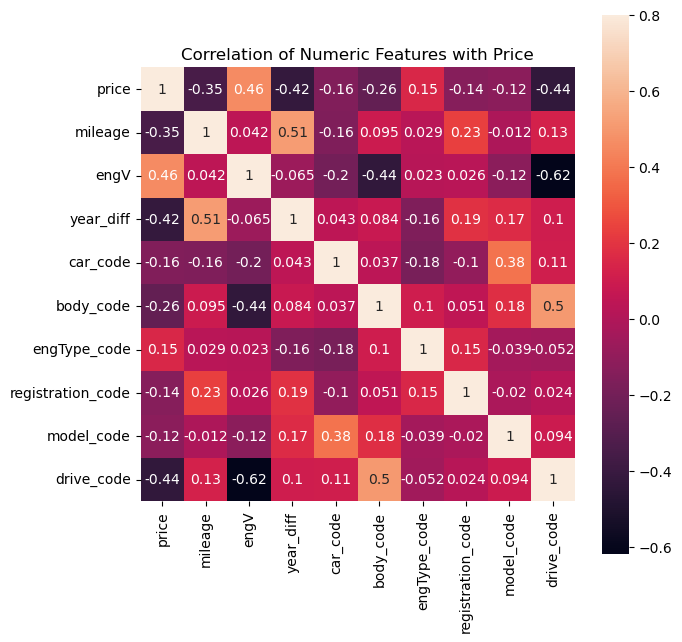

In [25]:
# outlier data
def outliers_proc(data, col_name, scale=3):
    def box_plot_outliers(data_ser, box_scale):
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)

    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print(f"Delete number is: {len(index)}")
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    
    return data_n

# Outlier Handling for 'engV' Columns
train = outliers_proc(train, 'engV', scale=3)


#Normalizing 'mileage' and 'engV'
min_max_scaler = preprocessing.MinMaxScaler()

train['mileage'] = min_max_scaler.fit_transform(train[['mileage']])
train['engV'] = min_max_scaler.fit_transform(train[['engV']])

# correlation analysis, calculate the correlation of some key features with 'price' and visualize it
data_numeric = train[['price', 'mileage', 'engV', 'year_diff', 'car_code', 'body_code', 
                      'engType_code', 'registration_code', 'model_code', 'drive_code']]
correlation = data_numeric.corr()
````
plt.figure(figsize=(7, 7))
sns.heatmap(correlation, annot=True, square=True, vmax=0.8)
plt.title('Correlation of Numeric Features with Price')
plt.show()

In [26]:
numeric_features = ['mileage', 'engV','year_diff', 'car_code', 'body_code', 'engType_code', 'registration_code', 'model_code', 'drive_code']

categorical_features = ['car', 'model', 'body', 'engType', 'registration', 'model', 'drive']

In [16]:
train['train']=1
test['train']=0
data = pd.concat([train, test], ignore_index=True, sort=False)

In [17]:
#import pandas as pd
#import numpy as np
#import warnings
warnings.filterwarnings('ignore')

In [18]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [19]:
sample_feature = reduce_mem_usage(pd.read_csv('C:/Users/lyx18/Downloads/cleaned_car_ad_encoded.csv'))
continuous_feature_names = [x for x in sample_feature.columns if x not in ['price','brand','model','brand']]

Memory usage of dataframe is 699252.00 MB
Memory usage after optimization is: 139956.00 MB
Decreased by 80.0%


In [27]:
#simple linear regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['car_code', 'body_code', 'engType_code', 'registration_code', 'model_code', 'drive_code', 'year_diff', 'mileage', 'engV']]
y = df['price']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

'intercept:'+ str(model.intercept_)

sorted(dict(zip(continuous_feature_names, model.coef_)).items(), key=lambda x:x[1], reverse=True)

print("Model coefficients:", model.coef_)

score = model.score(X_test, y_test)
print("Model R^2 score:", score)


Model coefficients: [-18104.44099828  -3140.98376534   4662.71452068  -4971.68128183
   3360.66918914 -17449.18114955 -48496.15424726 -37397.41777762
  17295.03877004]
Model R^2 score: 0.26675680866044027


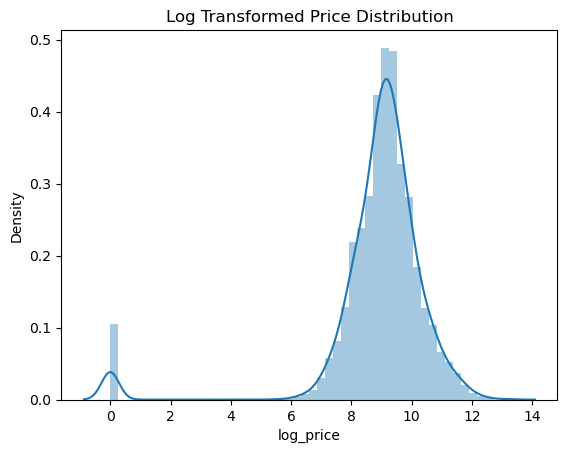

Mean Squared Error: 2.4697998045289813
R^2 Score: 0.15976678027262659
Sorted Model Coefficients: [('engV year_diff', 4.967812531029601), ('engV', 2.652699899610761), ('mileage', 0.6131735333746869), ('model_code', -6.338819453447835e-05), ('car_code', -0.00796420340352153), ('engType_code', -0.051721523154738935), ('body_code', -0.05293029422468553), ('mileage engV', -0.09326138133867028), ('drive_code', -0.1474674174692828), ('year_diff^2', -0.342054757467338), ('registration_code', -0.7251446520451238), ('year_diff', -0.8652767506526367), ('mileage^2', -1.7588273157107421), ('mileage year_diff', -3.7955562012130017), ('engV^2', -12.46377832910541)]


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import johnsonsu, lognorm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Handling of missing values
Train_data.fillna(Train_data.mean(), inplace=True)
Test_data.fillna(Test_data.mean(), inplace=True)

# Logarithmic conversion to reduce the bias of price
Train_data['log_price'] = np.log1p(Train_data['price'])

# Visualize the distribution of log prices
sns.distplot(Train_data['log_price']);
plt.title('Log Transformed Price Distribution')
plt.show()

# Normalize data and create polynomial features
scaler = MinMaxScaler()
Train_data[['mileage', 'engV', 'year_diff']] = scaler.fit_transform(Train_data[['mileage', 'engV', 'year_diff']])
Test_data[['mileage', 'engV', 'year_diff']] = scaler.transform(Test_data[['mileage', 'engV', 'year_diff']])
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(Train_data[['mileage', 'engV', 'year_diff']])
X_poly_test = poly.transform(Test_data[['mileage', 'engV', 'year_diff']])
poly_features = poly.get_feature_names_out(['mileage', 'engV', 'year_diff'])
Train_data = pd.concat([Train_data, pd.DataFrame(X_poly_train, columns=poly_features)], axis=1)
Test_data = pd.concat([Test_data, pd.DataFrame(X_poly_test, columns=poly_features)], axis=1)

# LinearRegression Model
X = Train_data[['car_code', 'body_code', 'engType_code', 'registration_code', 'model_code', 'drive_code', 'mileage', 'engV', 'year_diff'] + list(poly_features)]
y = Train_data['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


coef_dict = dict(zip(X.columns, model.coef_))
sorted_coef = sorted(coef_dict.items(), key=lambda x: x[1], reverse=True)
print("Sorted Model Coefficients:", sorted_coef)


In [29]:
#random forest
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Nonlinear transformation of continuous features
sample_feature['log_mileage'] = np.log1p(sample_feature['mileage'])  # log(1 + mileage)
sample_feature['log_engV'] = np.log1p(sample_feature['engV'])        # log(1 + engV)
sample_feature['log_year_diff'] = np.log1p(sample_feature['year_diff'])  # log(1 + year_diff)

# square term
sample_feature['mileage_squared'] = sample_feature['mileage'] ** 2
sample_feature['engV_squared'] = sample_feature['engV'] ** 2
sample_feature['year_diff_squared'] = sample_feature['year_diff'] ** 2

# One-Hot Encoding
categorical_features = ['car_code', 'body_code', 'engType_code', 'registration_code', 'model_code', 'drive_code']
sample_feature = pd.get_dummies(sample_feature, columns=categorical_features)

# normalize
scaler = StandardScaler()
continuous_features = ['log_mileage', 'log_engV', 'log_year_diff', 'mileage_squared', 'engV_squared', 'year_diff_squared']
sample_feature[continuous_features] = scaler.fit_transform(sample_feature[continuous_features])

# interaction
sample_feature['mileage_year_diff_interaction'] = sample_feature['mileage'] * sample_feature['year_diff']

#train data set
final_features = continuous_features + [col for col in sample_feature.columns if any(cat in col for cat in categorical_features)] + ['mileage_year_diff_interaction']

X = sample_feature[final_features]
y = sample_feature['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#random forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# train data
rf_model.fit(X_train, y_train)

# prediction
y_pred = rf_model.predict(X_test)


In [30]:
#Assessment models
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 4425.951220389042
Mean Absolute Error (MAE): 4425.951220389042


Cross-Validation MAE: 4483.879554829813
Feature Importances:
                           Feature  Importance
2                    log_year_diff    0.166919
956  mileage_year_diff_interaction    0.146453
4                     engV_squared    0.136877
1                         log_engV    0.127995
410                 model_code_309    0.120484
..                             ...         ...
691                 model_code_590    0.000000
65                     car_code_59    0.000000
548                 model_code_447    0.000000
743                 model_code_642    0.000000
875                 model_code_774    0.000000

[957 rows x 2 columns]


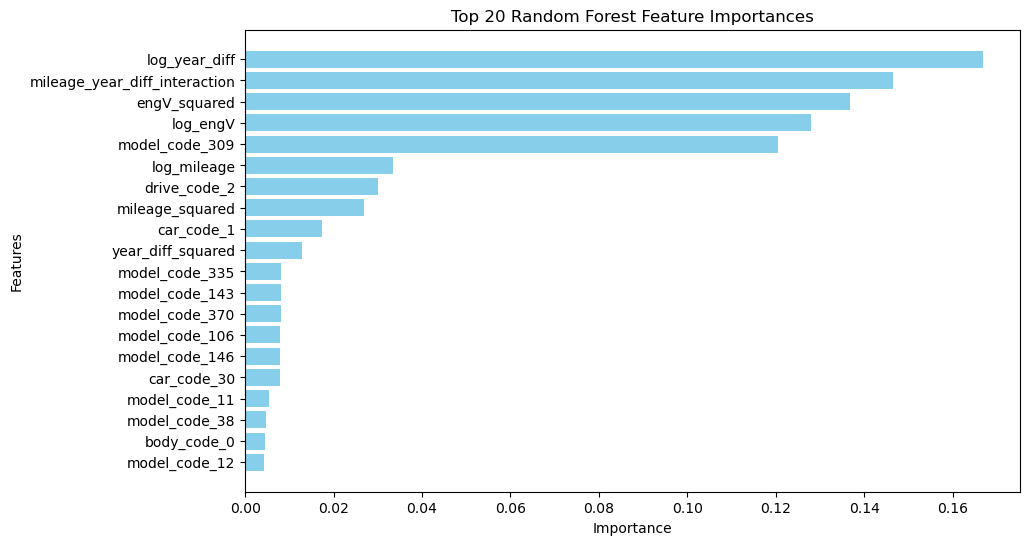

In [31]:
# cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-Validation MAE: {-np.mean(cv_scores)}")

# Characteristic importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': final_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

# visualize Characteristic importance
import matplotlib.pyplot as plt
#plt.figure(figsize=(10, 6))
#plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
#plt.xlabel('Importance')
#plt.ylabel('Features')
#plt.title('Random Forest Feature Importances')
#plt.gca().invert_yaxis()

# Rank the importance of features and select the top 20 most important features for visualization
top_n = 20
top_features = feature_importance_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title(f'Top {top_n} Random Forest Feature Importances')
plt.gca().invert_yaxis()
plt.show()


In [175]:
#XGBoost
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 217.9 kB/s eta 0:09:34
   ---------------------------------------- 0.0/124.9 MB 259.2 kB/s eta 0:08:02
   ---------------------------------------- 0.0/124.9 MB 279.3 kB/s eta 0:07:28
   ---------------------------------------- 0.1/124.9 MB 544.7 kB/s eta 0:03:50
   ---------------------------------------- 0.2/124.9 MB 827.9 kB/s eta 0:02:31
   ---------------------------------------- 0.4/124.9 MB 1.5 MB/s eta 0:01:24
   ---------------------------------------- 0.7/124.9 MB 2.1 MB/s eta 0:01:01
   ---------------------------------------- 1.2/124.9 MB 3.1 MB/s eta 0:00:41
    --------------------------------------- 1.8/124.9 MB 4.2 MB/s eta 0:00:30
    --------------------------------------- 2.4/124.9 MB 5.2 MB/s eta 0:00:24
    --------------------------------------- 3.1/124.9 MB 5.9 MB/s et

In [36]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


scaler = StandardScaler()
continuous_features = ['log_mileage', 'log_engV', 'log_year_diff', 'mileage_squared', 'engV_squared', 'year_diff_squared']
sample_feature[continuous_features] = scaler.fit_transform(sample_feature[continuous_features])


sample_feature['mileage_year_diff_interaction'] = sample_feature['mileage'] * sample_feature['year_diff']

categorical_features = [col for col in sample_feature.columns if 'model_code' in col or 'drive_code' in col]
final_features = continuous_features + categorical_features + ['mileage_year_diff_interaction']

X = sample_feature[final_features]
y = sample_feature['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-Validation MAE: {-np.mean(cv_scores)}")

Mean Absolute Error (MAE): 5464.482421875
Cross-Validation MAE: 5451.64873046875


Selected Features after Lasso: ['log_mileage' 'log_engV' 'log_year_diff' 'mileage_squared' 'engV_squared'
 'year_diff_squared' 'model_code_0' 'model_code_1' 'model_code_2'
 'model_code_3' 'model_code_4' 'model_code_5' 'model_code_6'
 'model_code_7' 'model_code_8' 'model_code_9' 'model_code_10'
 'model_code_11' 'model_code_12' 'model_code_13' 'model_code_14'
 'model_code_15' 'model_code_16' 'model_code_17' 'model_code_18'
 'model_code_19' 'model_code_20' 'model_code_21' 'model_code_22'
 'model_code_23' 'model_code_24' 'model_code_25' 'model_code_26'
 'model_code_27' 'model_code_28' 'model_code_29' 'model_code_30'
 'model_code_31' 'model_code_32' 'model_code_33' 'model_code_34'
 'model_code_35' 'model_code_36' 'model_code_37' 'model_code_38'
 'model_code_39' 'model_code_40' 'model_code_41' 'model_code_42'
 'model_code_43' 'model_code_44' 'model_code_45' 'model_code_46'
 'model_code_47' 'model_code_48' 'model_code_49' 'model_code_50'
 'model_code_51' 'model_code_52' 'model_code_53' 'model

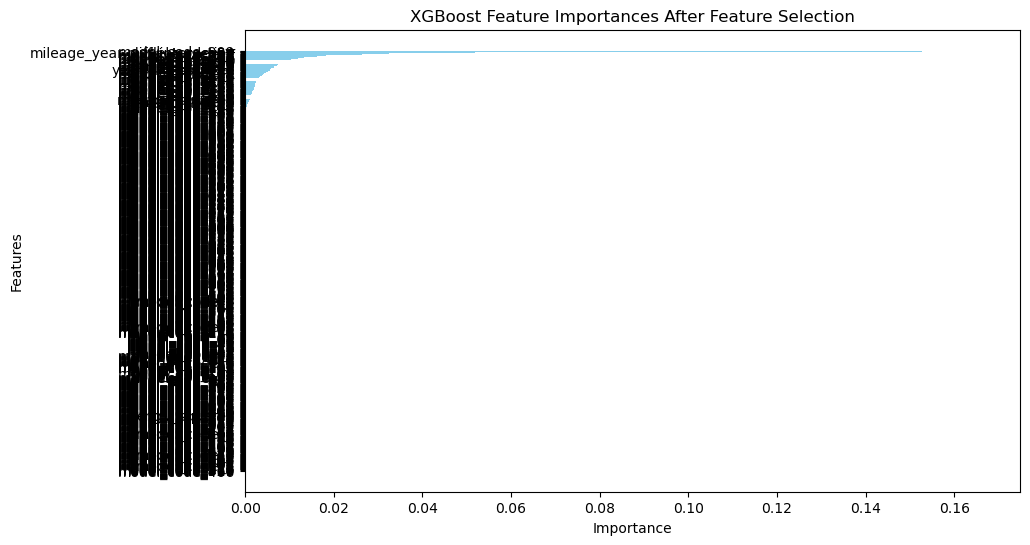

In [34]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel


# normalization
scaler = StandardScaler()
continuous_features = ['log_mileage', 'log_engV', 'log_year_diff', 'mileage_squared', 'engV_squared', 'year_diff_squared']
sample_feature[continuous_features] = scaler.fit_transform(sample_feature[continuous_features])

# interaction
sample_feature['mileage_year_diff_interaction'] = sample_feature['mileage'] * sample_feature['year_diff']

# feature
categorical_features = [col for col in sample_feature.columns if 'model_code' in col or 'drive_code' in col]
final_features = continuous_features + categorical_features + ['mileage_year_diff_interaction']
X = sample_feature[final_features]
y = sample_feature['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# L1 Lasso
lasso = Lasso(alpha=0.001) 
lasso.fit(X_train, y_train)
model = SelectFromModel(lasso, prefit=True)
X_train_lasso = model.transform(X_train)
X_test_lasso = model.transform(X_test)
selected_features = np.array(final_features)[model.get_support()]
print(f"Selected Features after Lasso: {selected_features}")

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train_lasso, y_train)

#evaluation
y_pred = xgb_model.predict(X_test_lasso)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

cv_scores = cross_val_score(xgb_model, X_train_lasso, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-Validation MAE: {-np.mean(cv_scores)}")

#importance feature
importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importances After Feature Selection')
plt.gca().invert_yaxis()
plt.show()


Selected Features after Lasso: ['model_code_446' 'model_code_57' 'model_code_9' 'model_code_104'
 'model_code_91' 'model_code_8' 'model_code_106' 'model_code_335'
 'model_code_11' 'model_code_373' 'model_code_48' 'log_engV'
 'model_code_31' 'model_code_17' 'model_code_170'
 'mileage_year_diff_interaction' 'model_code_25' 'model_code_678'
 'model_code_44' 'model_code_26' 'log_year_diff' 'model_code_294'
 'model_code_804' 'model_code_309' 'mileage_engV_interaction'
 'model_code_146' 'model_code_23' 'model_code_12' 'drive_code_2'
 'model_code_219' 'model_code_673' 'model_code_54' 'model_code_143'
 'model_code_499' 'model_code_370' 'model_code_32' 'model_code_39'
 'model_code_38' 'drive_code_0' 'model_code_124' 'model_code_727'
 'year_diff_squared' 'model_code_137' 'model_code_167' 'log_mileage'
 'model_code_331' 'model_code_123']
Mean Absolute Error (MAE): 5453.92236328125
Cross-Validation MAE: 5491.5447265625


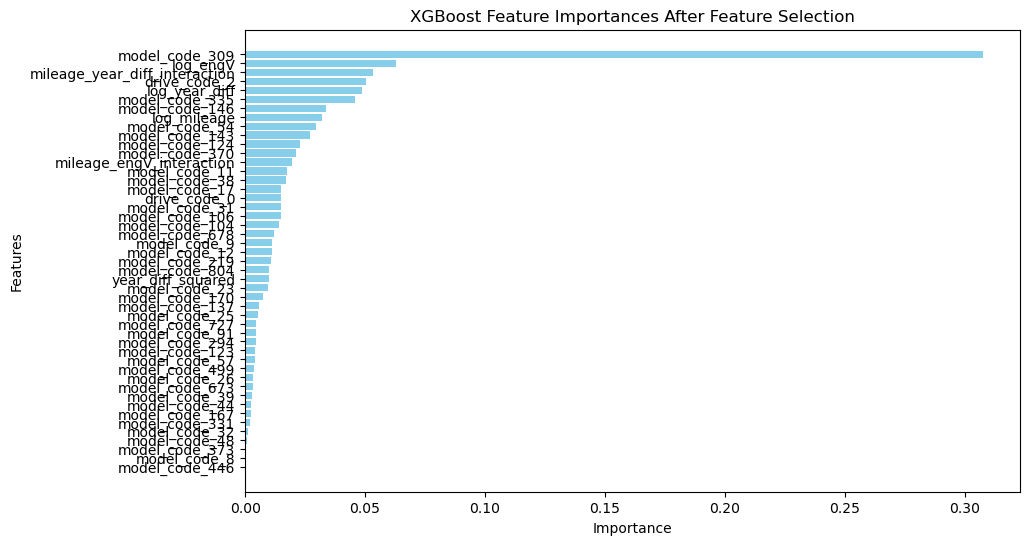

In [38]:
#Optimizing the xgboost model
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso


# Normaliaze
scaler = StandardScaler()
continuous_features = ['log_mileage', 'log_engV', 'log_year_diff', 'mileage_squared', 'engV_squared', 'year_diff_squared']
sample_feature[continuous_features] = scaler.fit_transform(sample_feature[continuous_features])

# add interaction
sample_feature['mileage_year_diff_interaction'] = sample_feature['mileage'] * sample_feature['year_diff']
sample_feature['engV_year_diff_interaction'] = sample_feature['engV'] * sample_feature['year_diff']
sample_feature['mileage_engV_interaction'] = sample_feature['mileage'] * sample_feature['engV']
 
# select categorical features, select feature based on correlation, and select characteristics with high correlation of target variables
categorical_features = [col for col in sample_feature.columns if 'model_code' in col or 'drive_code' in col]
corr_matrix = sample_feature.corr()  
correlation_threshold = 0.05 
highly_correlated_features = corr_matrix['price'][abs(corr_matrix['price']) > correlation_threshold].index.tolist()
final_features = list(set(continuous_features + categorical_features + ['mileage_year_diff_interaction', 
                        'engV_year_diff_interaction', 'mileage_engV_interaction']) & set(highly_correlated_features))

# Divide the data set
X = sample_feature[final_features]
y = sample_feature['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Feature selection using L1 regularization (Lasso regression)
lasso = Lasso(alpha=0.001) 
lasso.fit(X_train, y_train)

# select important feature with SelectFromModel
model = SelectFromModel(lasso, prefit=True)
X_train_lasso = model.transform(X_train)
X_test_lasso = model.transform(X_test)
selected_features = np.array(final_features)[model.get_support()]
print(f"Selected Features after Lasso: {selected_features}")

# Modeling based on XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train_lasso, y_train)
y_pred = xgb_model.predict(X_test_lasso)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
cv_scores = cross_val_score(xgb_model, X_train_lasso, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-Validation MAE: {-np.mean(cv_scores)}")

# feature importance
importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importances After Feature Selection')
plt.gca().invert_yaxis()
plt.show()


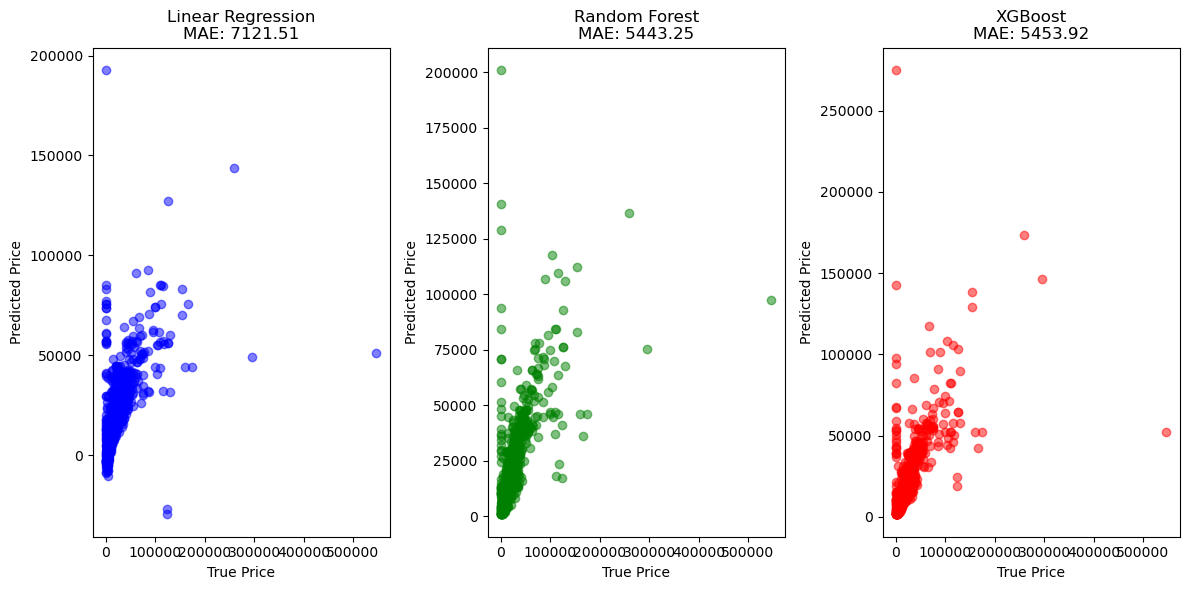

In [40]:
#evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Simple Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

# 2. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# 3. XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Visualization of the true values and the predictions of the three models
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
plt.title(f"Linear Regression\nMAE: {mae_linear:.2f}")
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
plt.title(f"Random Forest\nMAE: {mae_rf:.2f}")
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_xgb, color='red', alpha=0.5)
plt.title(f"XGBoost\nMAE: {mae_xgb:.2f}")
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

plt.tight_layout()
plt.show()